In [3]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head(100)

,id,url,domain,top_level_domain,crawl_date,http_status,mime_type,charset,language,is_https,has_js,num_images,outlinks_count,inlinks_count,anchors_count,content_length,page_rank,title,meta_description,content
0,1,https://www.blogsite2671.gov/footer/header/vec...,blogsite2671,gov,2025-02-02T09:58:57Z,301,application/xhtml+xml,utf-8,en,True,True,9,7,5,2,574,0.0000,Page Description User Footer Cloud,Stem model date tfidf anchor xml script search...,Keyword article mapreduce cloud mapreduce sear...
1,2,https://www.newsportal736.info/lemma,newsportal736,info,2024-05-22T04:44:41Z,200,text/html,utf-8,en,True,True,8,5,0,0,719,2.9497,Mapreduce Javascript View Mapreduce,Description model embed python click endpoint ...,Navigation crawl learning cloud endpoint click...
2,3,https://www.demo1072.com/hadoop/footer,demo1072,com,2024-08-16T00:52:22Z,200,text/html,iso-8859-1,en,True,True,6,11,0,2,1008,5.5591,Model Analysis Sidebar Content Json Script Date,Ugc learning mapreduce stem mapreduce video co...,Extract analysis download search analysis tfid...
3,4,https://www.example145.com/json,example145,com,2024-07-05T20:34:44Z,200,application/pdf,windows-1252,en,True,True,3,7,0,1,518,0.4695,Data Ugc View Content,Error lemma title stem api snippet comment vid...,Header request vector download nofollow anchor...
4,5,https://www.newsportal1665.gov/link/tokenize/l...,newsportal1665,gov,2025-01-23T21:06:10Z,200,application/pdf,iso-8859-1,de,True,True,5,1,0,1,1071,0.5288,Clean Header User Tokenize Dataset,Image embed extract mapreduce spark view heade...,Service endpoint download date request login s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,https://www.demo218.org/comment,demo218,org,2025-10-21T10:37:00Z,200,text/html,iso-8859-1,en,True,True,10,5,4,1,731,0.2590,Footer Page Title Dataset Download Image,User api user scala network time java stem vie...,Navigation dataset css learning bow author cra...
96,97,https://www.datasource415.com/index/dataset,datasource415,com,2024-01-12T03:47:25Z,200,text/html,windows-1252,en,True,False,8,1,0,2,880,1.4974,Vector Footer Anchor Nofollow Nofollow Subscri...,Click content login css token view image time ...,Header python anchor dataset token ugc bow des...
97,98,http://www.archive1457.net/download/api,archive1457,net,2024-02-11T09:49:36Z,200,text/html,utf-8,en,False,True,6,10,0,2,647,3.4522,View Search Comment Content,Search learning view summary model snippet dow...,Scala nofollow scala index nofollow tfidf down...
98,99,https://www.demo1121.de/date,demo1121,de,2025-08-14T12:59:14Z,200,text/html,windows-1252,en,True,True,4,6,2,2,798,3.9033,Python Nofollow Learning Mapreduce,Navigation stem blog image tfidf footer spark ...,Nofollow ugc embed news tokenize json date cli...


In [4]:
with open('stopwords.txt', 'r') as f:
    stopwords = set(f.read().splitlines())
stopwords.update(['http', 'https', 'www', 'com'])
stopwords = list(stopwords)


In [5]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [6]:
import re
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK data
nltk.download('punkt_tab')

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords and t.isalpha()]
    return tokens

df['tokens'] = df['content'].astype(str).apply(preprocess)
df[['content', 'tokens']].head(10)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,tokens
0,Keyword article mapreduce cloud mapreduce sear...,"[keyword, mapreduce, cloud, mapreduce, search,..."
1,Navigation crawl learning cloud endpoint click...,"[navigation, crawl, learning, cloud, endpoint,..."
2,Extract analysis download search analysis tfid...,"[extract, analysis, download, search, analysis..."
3,Header request vector download nofollow anchor...,"[header, request, vector, download, anchor, em..."
4,Service endpoint download date request login s...,"[service, endpoint, download, date, request, l..."
5,Vector json api crawl css cloud article link s...,"[vector, json, api, crawl, css, cloud, link, s..."
6,Anchor time mapreduce neural cloud data page s...,"[anchor, time, mapreduce, neural, cloud, data,..."
7,Author stem embed vector mapreduce click heade...,"[author, stem, embed, vector, mapreduce, heade..."
8,Dataset data post navigation bow error xml sca...,"[dataset, data, post, navigation, bow, error, ..."
9,Cloud login html crawl view anchor user servic...,"[cloud, login, html, crawl, view, anchor, user..."


In [7]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(t) for t in x])
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(t) for t in x])

df[['tokens', 'stemmed', 'lemmatized']].head(10)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...


,tokens,stemmed,lemmatized
0,"[keyword, mapreduce, cloud, mapreduce, search,...","[keyword, mapreduc, cloud, mapreduc, search, v...","[keyword, mapreduce, cloud, mapreduce, search,..."
1,"[navigation, crawl, learning, cloud, endpoint,...","[navig, crawl, learn, cloud, endpoint, dataset...","[navigation, crawl, learning, cloud, endpoint,..."
2,"[extract, analysis, download, search, analysis...","[extract, analysi, download, search, analysi, ...","[extract, analysis, download, search, analysis..."
3,"[header, request, vector, download, anchor, em...","[header, request, vector, download, anchor, em...","[header, request, vector, download, anchor, em..."
4,"[service, endpoint, download, date, request, l...","[servic, endpoint, download, date, request, lo...","[service, endpoint, download, date, request, l..."
5,"[vector, json, api, crawl, css, cloud, link, s...","[vector, json, api, crawl, css, cloud, link, s...","[vector, json, api, crawl, cs, cloud, link, sc..."
6,"[anchor, time, mapreduce, neural, cloud, data,...","[anchor, time, mapreduc, neural, cloud, data, ...","[anchor, time, mapreduce, neural, cloud, data,..."
7,"[author, stem, embed, vector, mapreduce, heade...","[author, stem, emb, vector, mapreduc, header, ...","[author, stem, embed, vector, mapreduce, heade..."
8,"[dataset, data, post, navigation, bow, error, ...","[dataset, data, post, navig, bow, error, xml, ...","[dataset, data, post, navigation, bow, error, ..."
9,"[cloud, login, html, crawl, view, anchor, user...","[cloud, login, html, crawl, view, anchor, user...","[cloud, login, html, crawl, view, anchor, user..."


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

docs = df['tokens'].apply(lambda x: ' '.join(x))
vectorizer = CountVectorizer(min_df=5, max_df=0.85)
bow = vectorizer.fit_transform(docs)
vocab = vectorizer.get_feature_names_out()


In [9]:
import numpy as np
term_freq = np.array(bow.sum(axis=0)).flatten()
top_idx = term_freq.argsort()[-50:][::-1]
top_terms = pd.DataFrame({'term': vocab[top_idx], 'count': term_freq[top_idx]})
top_terms


,term,count
0,link,77474
1,service,77419
2,header,77136
3,anchor,77106
4,vector,77071
5,scala,77056
6,meta,77005
7,javascript,76974
8,time,76966
9,comment,76956


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.85)
tfidf = tfidf_vectorizer.fit_transform(docs)
terms = tfidf_vectorizer.get_feature_names_out()


In [11]:
import numpy as np

tfidf_sum = tfidf.sum(axis=0).A1
ranking = np.argsort(tfidf_sum)[::-1]

for K in [50, 100, 200]:
    top_k_terms = pd.DataFrame({'term': terms[ranking[:K]], 'tfidf': tfidf_sum[ranking[:K]]})
    top_k_terms.to_csv(f'tfidf_top_{K}.csv', index=False)
top_k_terms.head(10)


,term,tfidf
0,link,4697.043837
1,service,4692.703442
2,request,4686.977832
3,scala,4685.039356
4,javascript,4683.881297
5,header,4683.411335
6,navigation,4683.063385
7,java,4681.924199
8,search,4681.245705
9,endpoint,4679.048616


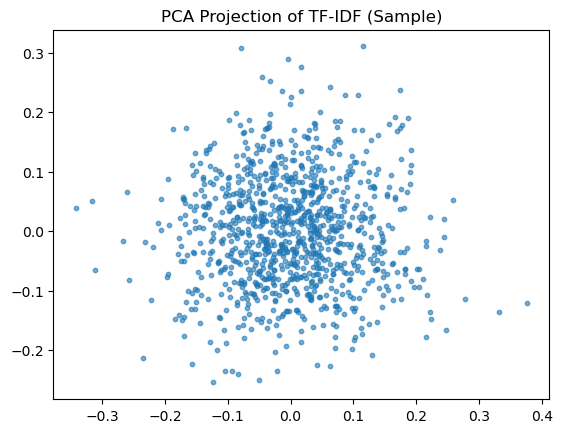

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf.toarray()[:1000])
plt.scatter(reduced[:,0], reduced[:,1], s=10, alpha=0.6)
plt.title('PCA Projection of TF-IDF (Sample)')
plt.show()


c:\Installations\Anaconda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Installations\Anaconda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


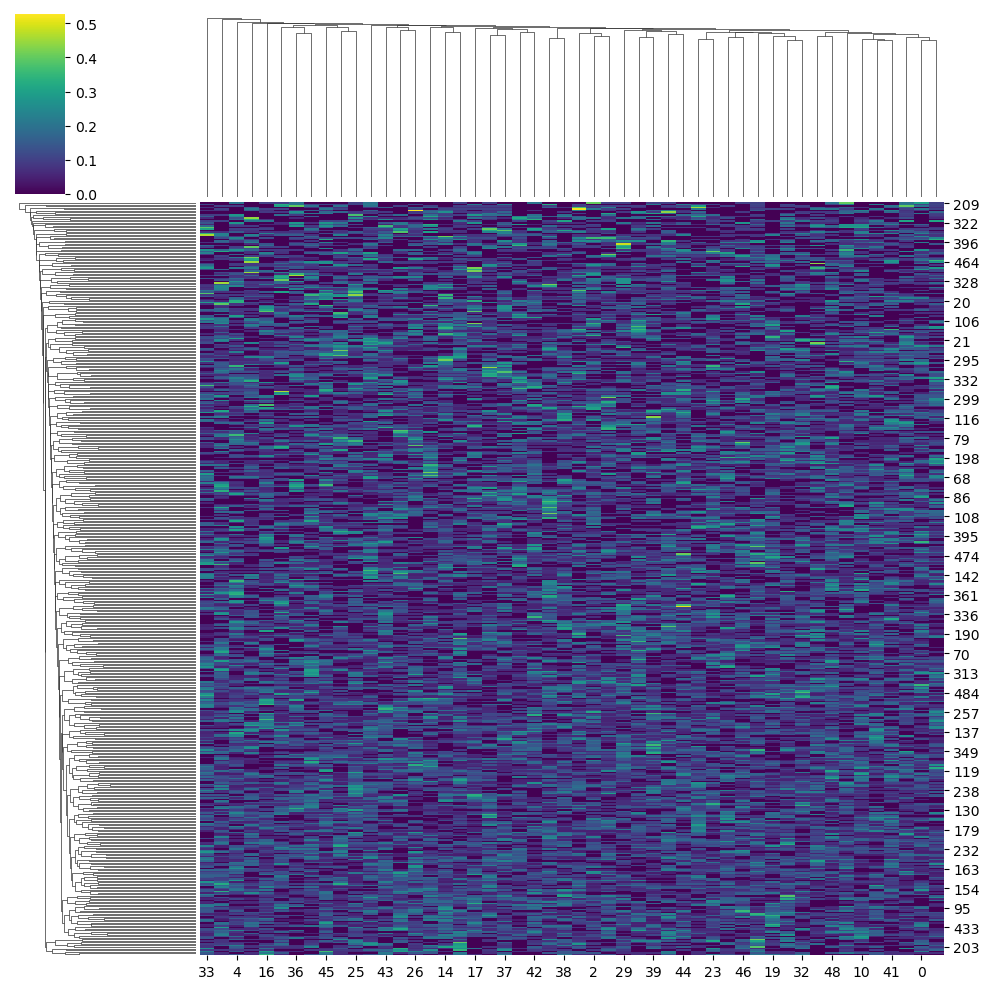

In [13]:
import seaborn as sns

sample = tfidf.toarray()[:500, ranking[:50]]
sns.clustermap(sample, cmap='viridis')


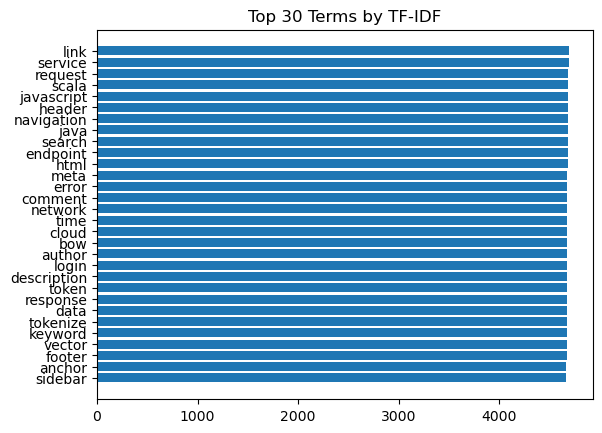

In [14]:
top_30 = pd.DataFrame({'term': terms[ranking[:30]], 'score': tfidf_sum[ranking[:30]]})
plt.barh(top_30['term'], top_30['score'])
plt.gca().invert_yaxis()
plt.title('Top 30 Terms by TF-IDF')
plt.show()


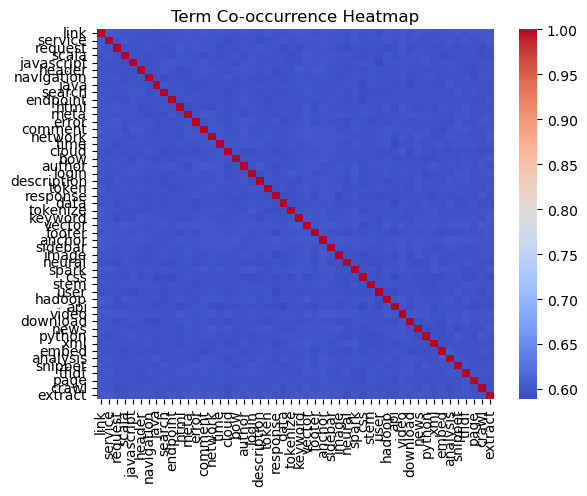

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

top_terms_matrix = tfidf[:, ranking[:50]].toarray()
corr = cosine_similarity(top_terms_matrix.T)
sns.heatmap(corr, xticklabels=terms[ranking[:50]], yticklabels=terms[ranking[:50]], cmap='coolwarm')
plt.title('Term Co-occurrence Heatmap')
plt.show()
